# Lab 7.1: Introduction to Time Series 

## Exploring Monthly Birth Data   

The number of live births (in hundreds of thousands) per month in the U.S. was 
collected for the past 31 years (https://s3-us-west-2.amazonaws.com/dsci/6002/data/birth.txt) starting in January 1980 and ending
December, 2010. We will be exploring this time series using various methods and predict
the birth counts for 2011.

1) Load the data into a pandas dataframe.

In [1]:
import pandas as pd
births_df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/birth.txt')
births_original = births_df.copy()

In [2]:
births_df.head()

,num_births
0,295
1,286
2,300
3,278
4,272


In [3]:
len(births_df)

372

2) Using `pandas.date_range()` to create a `dates` variable 
   (from January 1980 and ending December, 2010).

In [4]:
pd.date_range?

In [5]:
dates = pd.date_range(start='01/01/1980',end='12/31/2010',freq='M')

In [6]:
len(dates)

372

In [7]:
dates

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', length=372, freq='M')

3) Create a `time` variable (range: 1-372) to be used later in the regressions 
and both a `month` and `year` variable (use `pd.DatetimeIndex` to strip these 
values from your dates). 

In [8]:
pd.DatetimeIndex?

In [9]:
time = list(range(1,373))

In [10]:
month = dates.month

In [11]:
month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10

In [12]:
year = dates.year

In [13]:
len(year)

372

4) Set the `dates` variable as the index of your dataframe.

In [14]:
births_df['Month']=dates


In [15]:
births_df.head()

,num_births,Month
0,295,1980-01-31
1,286,1980-02-29
2,300,1980-03-31
3,278,1980-04-30
4,272,1980-05-31


In [16]:
births_df= births_df.set_index('Month')


In [17]:
births_df.head()

,num_births
Month,
1980-01-31,295
1980-02-29,286
1980-03-31,300
1980-04-30,278
1980-05-31,272


5) Calculate some aggregated statistics by month and year. What months have 
the highest birthrates? Any intuition as to why?

In [18]:
#Aggregate birthds per month
births_df.groupby(births_df.index.month).sum()

,num_births
1,9493
2,8942
3,9577
4,9008
5,9315
6,9428
7,10164
8,10359
9,10231
10,10008


In [19]:
#Aggregate births per year
births_df.groupby(births_df.index.year).sum()

,num_births
1980,3536
1981,3554
1982,3554
1983,3751
1984,3845
1985,3900
1986,4020
1987,4046
1988,4164
1989,4253


# The most popular months for having children appears to be July, August, September, October. If it takes roughly eight months before a child to be born, that means that (potentially) Christmas, New Year's, and Valentines Day are all very popular holidays to procreate. 

6) Turn the `num_births` into a time series using `pd.Series()`.

In [20]:
births_series = pd.Series(births_df.num_births)

In [21]:
births_series

Month
1980-01-31    295
1980-02-29    286
1980-03-31    300
1980-04-30    278
1980-05-31    272
1980-06-30    268
1980-07-31    308
1980-08-31    321
1980-09-30    313
1980-10-31    308
1980-11-30    291
1980-12-31    296
1981-01-31    294
1981-02-28    273
1981-03-31    300
1981-04-30    271
1981-05-31    282
1981-06-30    285
1981-07-31    318
1981-08-31    323
1981-09-30    313
1981-10-31    311
1981-11-30    291
1981-12-31    293
1982-01-31    297
1982-02-28    273
1982-03-31    294
1982-04-30    259
1982-05-31    276
1982-06-30    294
             ... 
2008-07-31    278
2008-08-31    286
2008-09-30    278
2008-10-31    260
2008-11-30    272
2008-12-31    274
2009-01-31    256
2009-02-28    276
2009-03-31    259
2009-04-30    273
2009-05-31    272
2009-06-30    297
2009-07-31    296
2009-08-31    290
2009-09-30    282
2009-10-31    262
2009-11-30    275
2009-12-31    262
2010-01-31    251
2010-02-28    285
2010-03-31    260
2010-04-30    272
2010-05-31    265
2010-06-30    296
2010

7) Plot the overall data. What are your thoughts about the general pattern 
and or seasonal variation?

![image](images/birthdata.png)

In [22]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


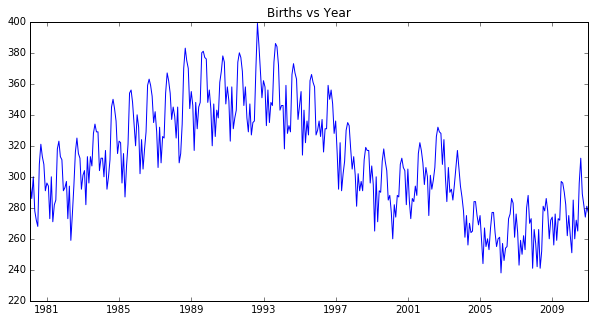

In [23]:
plt.figure(figsize=(10,5))
plt.plot(dates,births_series)
plt.title('Births vs Year')

# Within each year there seems to be a pattern, obsered above, of births spiking near months July-October then declining. In more recent years, the birth rate has been declining which probably reflects the general increase in cost of having a child in the United States.

In [24]:
births_df.head()

,num_births
Month,
1980-01-31,295
1980-02-29,286
1980-03-31,300
1980-04-30,278
1980-05-31,272


8) Plot the data for 2006-2010, is the seasonal pattern more apparent? 

In [25]:

greater_than_2006 = births_df.index.year>=2006
less_than_2010 = births_df.index.year<=2010
births_df[greater_than_2006 & less_than_2010].head()

,num_births
Month,
2006-01-31,261
2006-02-28,238
2006-03-31,257
2006-04-30,246
2006-05-31,254


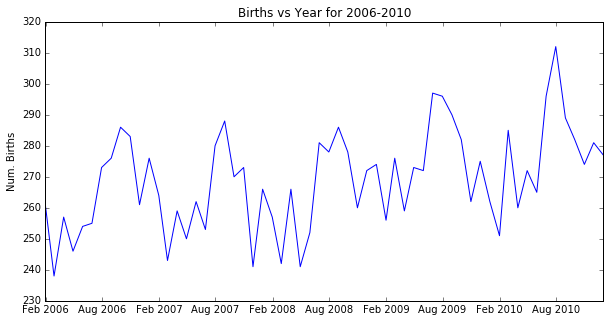

In [26]:
plt.figure(figsize=(10,5))
plt.plot(births_df[greater_than_2006 & less_than_2010])
plt.title('Births vs Year for 2006-2010')
plt.ylabel('Num. Births')

# Yes this seasonal pattern is more apparent. We can see a distinctive spike in births around August every year.

9) Use `df.resample('Q-NOV')` to get quarterly means that follow the seasons of the year (spring, summer, fall, winter). 

In [27]:
quarterly_mean_births_df = births_df.resample('Q-NOV')

In [28]:
quarterly_mean_births_df.head()

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


,num_births
Month,
1980-02-29,290.500000
1980-05-31,283.333333
1980-08-31,299.000000
1980-11-30,304.000000
1981-02-28,287.666667


In [29]:
yearly_mean_births_df = births_df.resample('A-NOV')

10) Superimpose the yearly averages and the seasonal averages onto the monthly
data.

![image](images/birthdata_with_averages.png)

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2534: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  return y.index.values, y.values


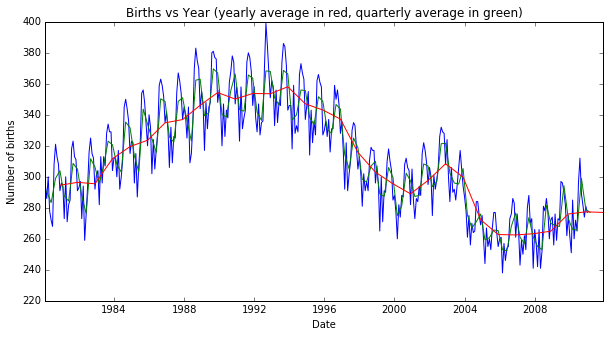

In [30]:
plt.figure(figsize=(10,5))
plt.plot(dates,births_series)
plt.plot(quarterly_mean_births_df,color='green')
plt.plot(yearly_mean_births_df,color='red')
plt.title('Births vs Year (yearly average in red, quarterly average in green)')
plt.ylabel('Number of births')
plt.xlabel('Date')